<function matplotlib.pyplot.show(*args, **kw)>

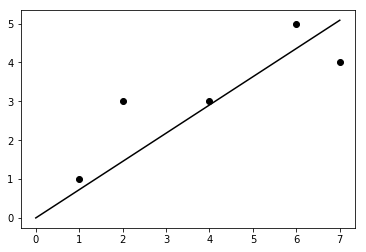

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def reg1dim1(x, y):
    a = np.dot(x, y) / (x**2).sum()
    return a

x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])
a = reg1dim1(x, y)

%matplotlib inline

plt.scatter(x, y, color = 'k')
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color = 'k')
plt.show

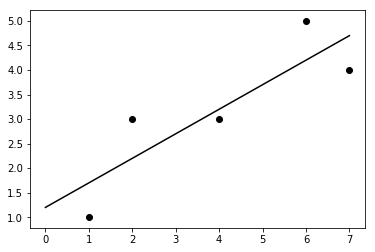

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def reg1dim2(x, y):
    n = len(x)
    a = ((np.dot(x, y) - y.sum() * x.sum() / n) / ((x ** 2).sum() - x.sum() ** 2/n))
    b = (y.sum() - a * x.sum()) /n 
    return a, b

x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])

a, b = reg1dim2(x, y)

plt.scatter(x, y, color = "k")
xmax = x.max()
plt.plot([0, xmax], [b, a * xmax + b], color="k")
plt.show()

In [21]:
from scipy import linalg

class LinerRegression:
  def __init__(self):
    self.w_ = None

  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    b = np.dot(Xtil.T, t)
    self.w_ = linalg.solve(A, b)

  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)

# numpy.c_ は行列同士の結合に使われる via https://deepage.net/features/numpy-cr.html#numpyc_%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6


係数 [1.11450326 1.95737004 3.00295751]
(1,1)に対する予測値: [6.07483081]


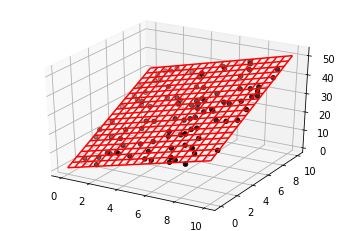

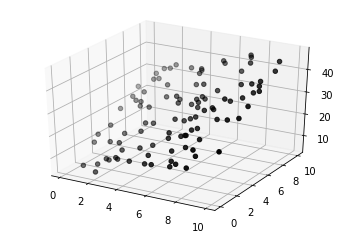

In [26]:
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10
np.random.seed(0)

X = np.random.random((n, 2))*scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = LinerRegression()
model.fit(X, y)
print("係数", model.w_)
print("(1,1)に対する予測値:", model.predict(np.array([1,1])))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1]* xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y, color="k")
plt.show()